
<font size="+6">**AUTHOR: Masbul Haider Ovi**</font>



# **Importing Libraries**

Task 6: Prediction using Decision Tree Algorithm


In [ ]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

# **EDA AND Visualizations**

In [ ]:
data=pd.read_csv('/content/Iris.csv')

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


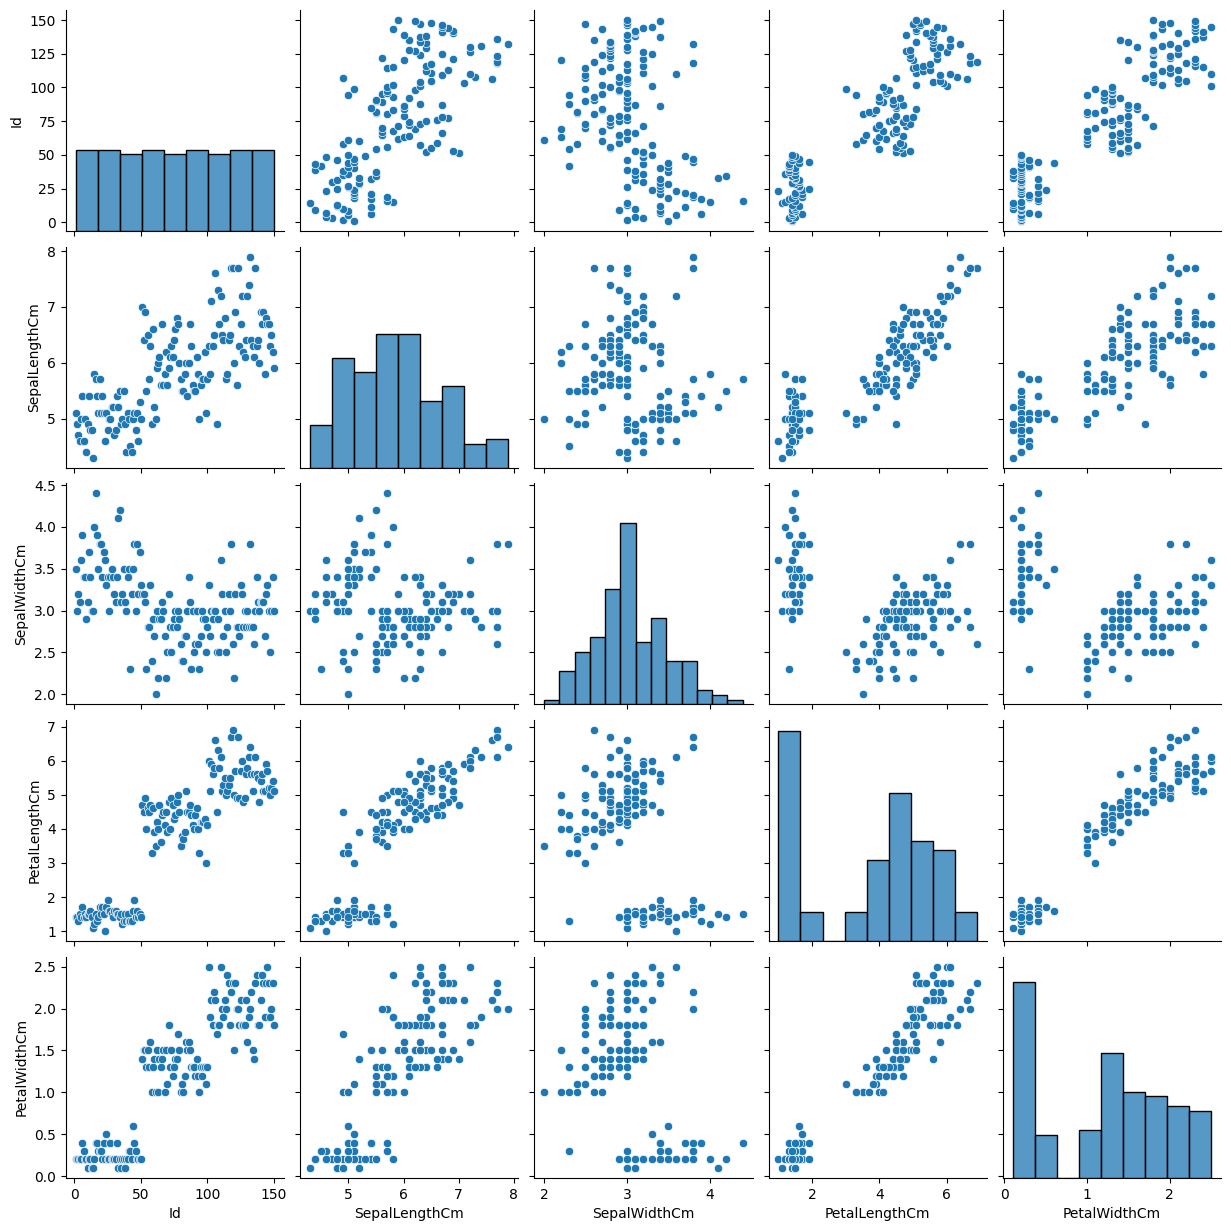

In [ ]:
sns.pairplot(data)

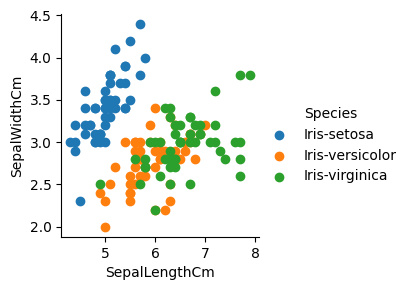

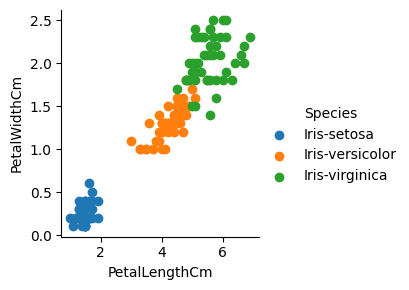

In [ ]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

In [ ]:
Y_data=data['Species']

X_data=data.drop(['Id','Species'],axis=1)

In [ ]:
X=X_data.values

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categories
y= label_encoder.fit_transform(Y_data)


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# **Training the Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


# **Prediction**

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


# **Model Visualization**

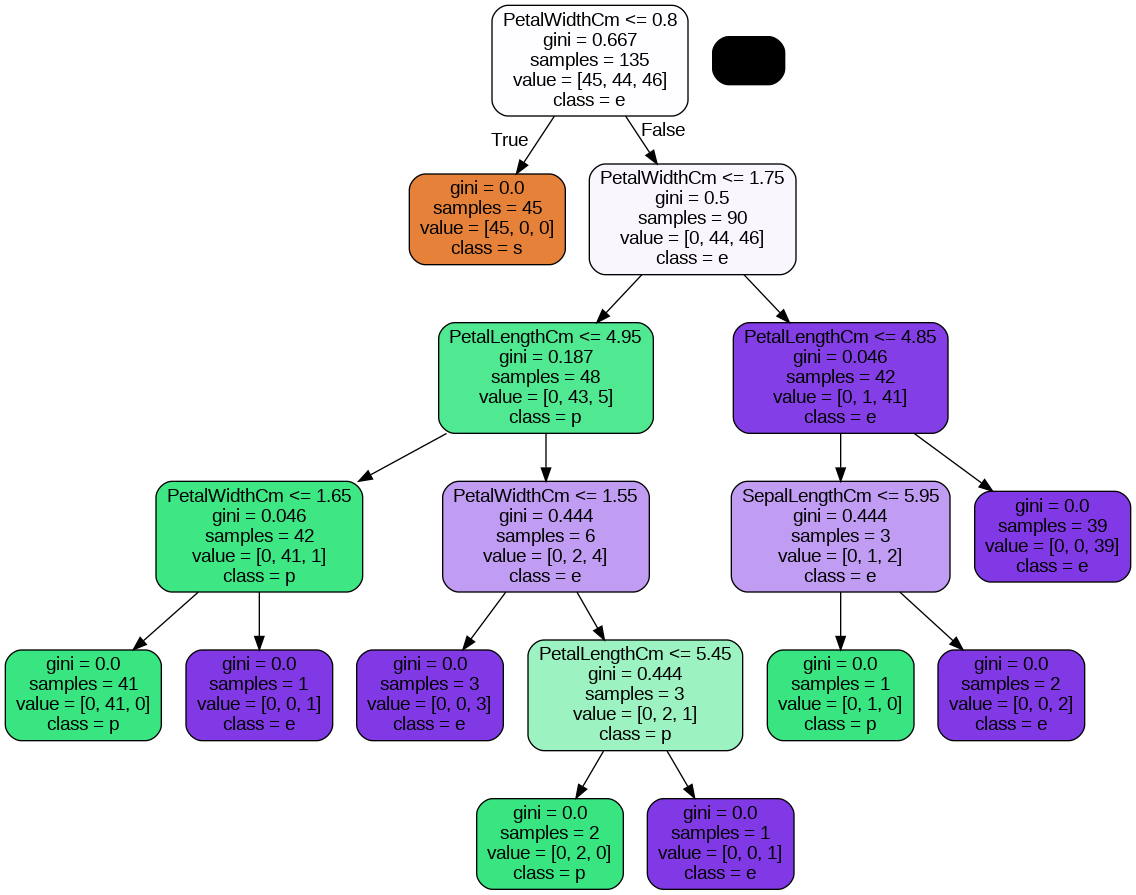

In [ ]:
export_graphviz(
        tree_classifier,
        out_file="img\model.dot",
        feature_names=X_data.columns,
        class_names='species',
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\model.dot')
graph.write_png('img\model.png')

Image(filename='img\model.png') 

In [ ]:
print('Class Names =  setosa ,versicolor,virginica\n')
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. \n")

print('Output = ',tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print()

print("Our model predicts the class as 0, that is, setosa.")

Class Names =  setosa ,versicolor,virginica

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


# **Model Evaluation**

In [ ]:
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0
